In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2

In [2]:
monday=pd.read_csv('monday.csv', sep=';')
tuesday=pd.read_csv('tuesday.csv', sep=';')
wednesday=pd.read_csv('wednesday.csv', sep=';')
thursday=pd.read_csv('thursday.csv',sep=';')
friday=pd.read_csv('friday.csv', sep=';')

In [3]:
df = pd.concat([monday, tuesday, wednesday, thursday, friday], join='inner', ignore_index=True)

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index("timestamp",inplace=True)
df['weekday'] = df.index.day_name()
df['time']=df.index.time
df['hour'] = df.index.hour

df.head()

,customer_no,location,weekday,time,hour
timestamp,,,,,
2019-09-02 07:03:00,1,dairy,Monday,07:03:00,7
2019-09-02 07:03:00,2,dairy,Monday,07:03:00,7
2019-09-02 07:04:00,3,dairy,Monday,07:04:00,7
2019-09-02 07:04:00,4,dairy,Monday,07:04:00,7
2019-09-02 07:04:00,5,spices,Monday,07:04:00,7


In [5]:
df['customer_no'] =  df['weekday']+ '_' + df['customer_no'].astype(str) 
df['customer_no'].head(5)

timestamp
2019-09-02 07:03:00    Monday_1
2019-09-02 07:03:00    Monday_2
2019-09-02 07:04:00    Monday_3
2019-09-02 07:04:00    Monday_4
2019-09-02 07:04:00    Monday_5
Name: customer_no, dtype: object

In [6]:
df.to_csv('full_week.csv')

### 1. Calculate the total number of customers in each section

In [7]:
df.groupby('location')['customer_no'].count()

location
checkout    7417
dairy       4679
drinks      3905
fruit       5122
spices      3754
Name: customer_no, dtype: int64

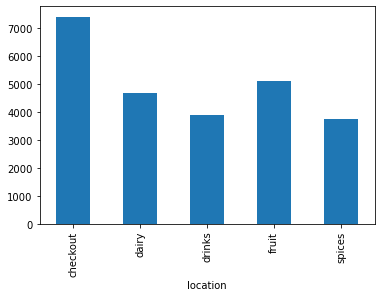

In [8]:
df.groupby('location')['customer_no'].count().plot.bar();

### 2. Calculate the total number of customers in each section over time

In [9]:
df.groupby(['time','location'])['customer_no'].count().unstack()

location,checkout,dairy,drinks,fruit,spices
time,,,,,
07:00:00,NaN,3.0,3.0,4.0,NaN
07:01:00,2.0,4.0,1.0,1.0,1.0
07:02:00,5.0,1.0,1.0,1.0,1.0
07:03:00,1.0,8.0,2.0,3.0,2.0
07:04:00,2.0,5.0,1.0,2.0,4.0
...,...,...,...,...,...
21:46:00,5.0,1.0,5.0,6.0,3.0
21:47:00,5.0,5.0,1.0,5.0,1.0
21:48:00,7.0,7.0,2.0,3.0,4.0


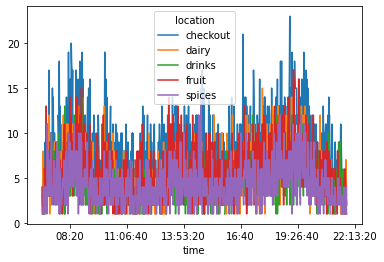

In [10]:
df.groupby(['time','location'])['customer_no'].count().unstack().plot();

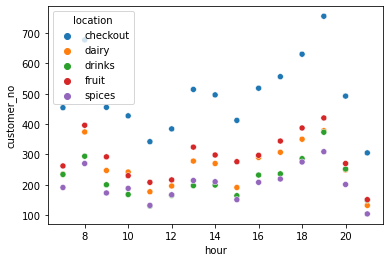

In [11]:
total_customers_hour = pd.DataFrame(df.groupby(['location','hour'])['customer_no'].nunique())
sns.scatterplot(data=total_customers_hour, x='hour', y='customer_no',hue='location');

In [12]:
#sns.relplot(x='hour', y='customer_no', hue='location', kind='line', data=total_customers_hour);

### 3. Display the number of customers at checkout over time

In [13]:
df[df['location']=='checkout'].groupby('time')['customer_no'].count()

time
07:01:00    2
07:02:00    5
07:03:00    1
07:04:00    2
07:05:00    7
           ..
21:46:00    5
21:47:00    5
21:48:00    7
21:49:00    6
21:50:00    2
Name: customer_no, Length: 890, dtype: int64

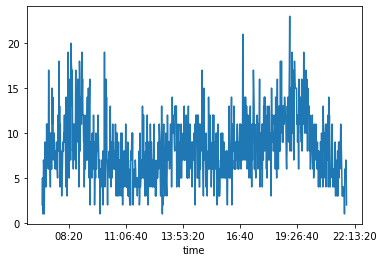

In [14]:
df[df['location']=='checkout'].groupby('time')['customer_no'].count().plot();

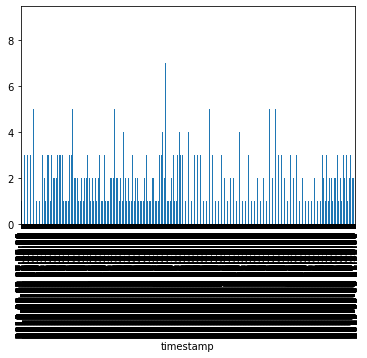

In [15]:
df.loc[df['location'] == 'checkout'].groupby('timestamp').size().plot.bar();

In [16]:
locations = df.groupby('location')['customer_no'].count()
len(df['customer_no'].unique()) - locations.iloc[0]

28

### 4. Calculate the time each customer spent in the market

In [17]:
df

,customer_no,location,weekday,time,hour
timestamp,,,,,
2019-09-02 07:03:00,Monday_1,dairy,Monday,07:03:00,7
2019-09-02 07:03:00,Monday_2,dairy,Monday,07:03:00,7
2019-09-02 07:04:00,Monday_3,dairy,Monday,07:04:00,7
2019-09-02 07:04:00,Monday_4,dairy,Monday,07:04:00,7
2019-09-02 07:04:00,Monday_5,spices,Monday,07:04:00,7
...,...,...,...,...,...
2019-09-06 21:50:00,Friday_1500,dairy,Friday,21:50:00,21
2019-09-06 21:50:00,Friday_1507,checkout,Friday,21:50:00,21
2019-09-06 21:50:00,Friday_1508,checkout,Friday,21:50:00,21


In [18]:
enter_time = (
    df.reset_index()[['timestamp', 'customer_no']].groupby('customer_no').min()
)
enter_time.rename(columns={'timestamp': 'enter_time'}, inplace=True)
enter_time.sort_values('enter_time')

,enter_time
customer_no,
Monday_1,2019-09-02 07:03:00
Monday_2,2019-09-02 07:03:00
Monday_4,2019-09-02 07:04:00
Monday_3,2019-09-02 07:04:00
Monday_5,2019-09-02 07:04:00
...,...
Friday_1506,2019-09-06 21:48:00
Friday_1507,2019-09-06 21:48:00
Friday_1508,2019-09-06 21:48:00


In [19]:
exit_time = (
    df.reset_index()[['timestamp', 'customer_no']].groupby('customer_no').max()
)
exit_time.rename(columns={'timestamp': 'exit_time'}, inplace=True)
exit_time.sort_values('exit_time')

,exit_time
customer_no,
Monday_1,2019-09-02 07:05:00
Monday_5,2019-09-02 07:05:00
Monday_3,2019-09-02 07:06:00
Monday_2,2019-09-02 07:06:00
Monday_8,2019-09-02 07:07:00
...,...
Friday_1500,2019-09-06 21:50:00
Friday_1510,2019-09-06 21:50:00
Friday_1496,2019-09-06 21:50:00


In [20]:
time_spent = pd.concat([enter_time, exit_time], axis=1)
time_spent

,enter_time,exit_time
customer_no,,
Friday_1,2019-09-06 07:00:00,2019-09-06 07:05:00
Friday_10,2019-09-06 07:06:00,2019-09-06 07:11:00
Friday_100,2019-09-06 08:03:00,2019-09-06 08:04:00
Friday_1000,2019-09-06 17:19:00,2019-09-06 17:20:00
Friday_1001,2019-09-06 17:19:00,2019-09-06 17:29:00
...,...,...
Wednesday_995,2019-09-04 16:52:00,2019-09-04 17:20:00
Wednesday_996,2019-09-04 16:52:00,2019-09-04 17:03:00
Wednesday_997,2019-09-04 16:52:00,2019-09-04 17:14:00


In [21]:
time_spent['time_spent'] = (time_spent['exit_time'] - time_spent['enter_time'])
time_spent.sort_values('enter_time')

,enter_time,exit_time,time_spent
customer_no,,,
Monday_1,2019-09-02 07:03:00,2019-09-02 07:05:00,0 days 00:02:00
Monday_2,2019-09-02 07:03:00,2019-09-02 07:06:00,0 days 00:03:00
Monday_4,2019-09-02 07:04:00,2019-09-02 07:08:00,0 days 00:04:00
Monday_3,2019-09-02 07:04:00,2019-09-02 07:06:00,0 days 00:02:00
Monday_5,2019-09-02 07:04:00,2019-09-02 07:05:00,0 days 00:01:00
...,...,...,...
Friday_1506,2019-09-06 21:48:00,2019-09-06 21:48:00,0 days 00:00:00
Friday_1507,2019-09-06 21:48:00,2019-09-06 21:50:00,0 days 00:02:00
Friday_1508,2019-09-06 21:48:00,2019-09-06 21:50:00,0 days 00:02:00


In [22]:
time_spent['time_spent'].max()

Timedelta('0 days 00:52:00')

In [23]:
time_spent['minutes'] = time_spent['time_spent'].dt.total_seconds()/60
time_spent['minutes']

customer_no
Friday_1          5.0
Friday_10         5.0
Friday_100        1.0
Friday_1000       1.0
Friday_1001      10.0
                 ... 
Wednesday_995    28.0
Wednesday_996    11.0
Wednesday_997    22.0
Wednesday_998     6.0
Wednesday_999     1.0
Name: minutes, Length: 7445, dtype: float64

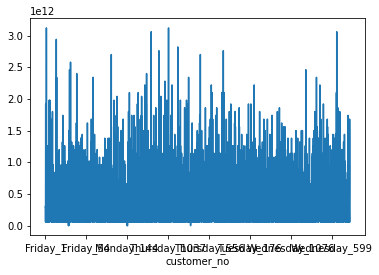

In [24]:
time_spent['time_spent'].plot();

In [25]:
time1=time_spent.reset_index()

In [26]:
df1 = time1.merge(df)

In [27]:
df1

,customer_no,enter_time,exit_time,time_spent,minutes,location,weekday,time,hour
0,Friday_1,2019-09-06 07:00:00,2019-09-06 07:05:00,0 days 00:05:00,5.0,dairy,Friday,07:00:00,7
1,Friday_1,2019-09-06 07:00:00,2019-09-06 07:05:00,0 days 00:05:00,5.0,spices,Friday,07:04:00,7
2,Friday_1,2019-09-06 07:00:00,2019-09-06 07:05:00,0 days 00:05:00,5.0,checkout,Friday,07:05:00,7
3,Friday_10,2019-09-06 07:06:00,2019-09-06 07:11:00,0 days 00:05:00,5.0,fruit,Friday,07:06:00,7
4,Friday_10,2019-09-06 07:06:00,2019-09-06 07:11:00,0 days 00:05:00,5.0,checkout,Friday,07:11:00,7
...,...,...,...,...,...,...,...,...,...
24872,Wednesday_998,2019-09-04 16:53:00,2019-09-04 16:59:00,0 days 00:06:00,6.0,dairy,Wednesday,16:53:00,16
24873,Wednesday_998,2019-09-04 16:53:00,2019-09-04 16:59:00,0 days 00:06:00,6.0,fruit,Wednesday,16:57:00,16
24874,Wednesday_998,2019-09-04 16:53:00,2019-09-04 16:59:00,0 days 00:06:00,6.0,checkout,Wednesday,16:59:00,16
24875,Wednesday_999,2019-09-04 16:53:00,2019-09-04 16:54:00,0 days 00:01:00,1.0,fruit,Wednesday,16:53:00,16


### 5. Calculate the total number of customers in the supermarket over time.

In [28]:
df.groupby('time')['customer_no'].count()

time
07:00:00    10
07:01:00     9
07:02:00     9
07:03:00    16
07:04:00    14
            ..
21:46:00    20
21:47:00    17
21:48:00    23
21:49:00    18
21:50:00     9
Name: customer_no, Length: 891, dtype: int64

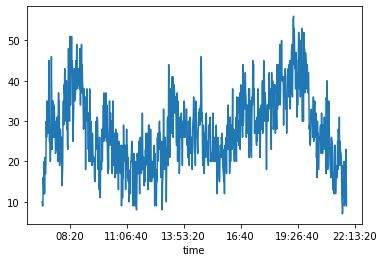

In [29]:
df.groupby('time')['customer_no'].count().plot();

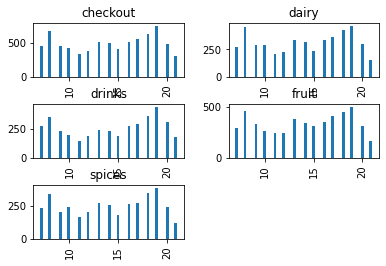

In [30]:
df['hour'].hist(by=df['location'], bins=50);

### 6. Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [31]:
df2=df.copy()
df2

,customer_no,location,weekday,time,hour
timestamp,,,,,
2019-09-02 07:03:00,Monday_1,dairy,Monday,07:03:00,7
2019-09-02 07:03:00,Monday_2,dairy,Monday,07:03:00,7
2019-09-02 07:04:00,Monday_3,dairy,Monday,07:04:00,7
2019-09-02 07:04:00,Monday_4,dairy,Monday,07:04:00,7
2019-09-02 07:04:00,Monday_5,spices,Monday,07:04:00,7
...,...,...,...,...,...
2019-09-06 21:50:00,Friday_1500,dairy,Friday,21:50:00,21
2019-09-06 21:50:00,Friday_1507,checkout,Friday,21:50:00,21
2019-09-06 21:50:00,Friday_1508,checkout,Friday,21:50:00,21


In [32]:
df2['first_location'] = df2.duplicated('customer_no')
first_location = df2[df2['first_location'] == False]
following = df2[df2['first_location'] == True]
first_location

,customer_no,location,weekday,time,hour,first_location
timestamp,,,,,,
2019-09-02 07:03:00,Monday_1,dairy,Monday,07:03:00,7,False
2019-09-02 07:03:00,Monday_2,dairy,Monday,07:03:00,7,False
2019-09-02 07:04:00,Monday_3,dairy,Monday,07:04:00,7,False
2019-09-02 07:04:00,Monday_4,dairy,Monday,07:04:00,7,False
2019-09-02 07:04:00,Monday_5,spices,Monday,07:04:00,7,False
...,...,...,...,...,...,...
2019-09-06 21:48:00,Friday_1506,dairy,Friday,21:48:00,21,False
2019-09-06 21:48:00,Friday_1507,dairy,Friday,21:48:00,21,False
2019-09-06 21:48:00,Friday_1508,dairy,Friday,21:48:00,21,False


In [33]:
# number of customers by first location
first_location_count=first_location.groupby('location').count()['customer_no']
first_location_count

location
dairy     2141
drinks    1143
fruit     2810
spices    1351
Name: customer_no, dtype: int64

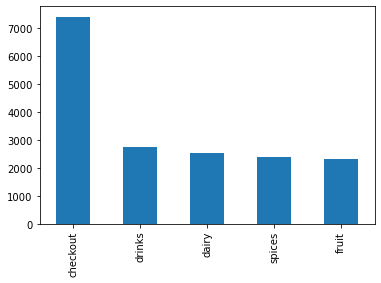

In [34]:
df2.loc[df2['first_location'] == True, 'location'].value_counts().plot.bar();

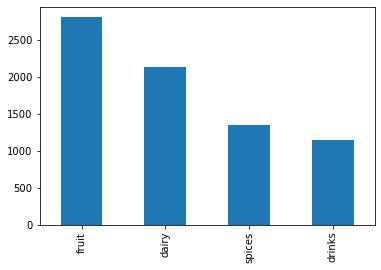

In [35]:
df2.loc[df2['first_location'] == False, 'location'].value_counts().plot.bar();

### 7. Estimate the total revenue per customer

In [36]:
revenues = pd.DataFrame(
    {"location": ["fruit", "spices", "dairy", "drinks"], "revenue": [4, 3, 5, 6]})
revenues

,location,revenue
0,fruit,4
1,spices,3
2,dairy,5
3,drinks,6


In [37]:
df2.loc[df2['location'] == 'fruit', 'revenue'] = '4'
df2.loc[df2['location'] == 'spices', 'revenue'] = '3'
df2.loc[df2['location'] == 'dairy', 'revenue'] = '5'
df2.loc[df2['location'] == 'drinks', 'revenue'] = '6'
df2.loc[df2['location'] == 'checkout', 'revenue'] = '0'


df2['revenue'] = df2['revenue'].astype(int)
df2.groupby('customer_no')[['revenue']].sum().sort_values('revenue', ascending=False)

,revenue
customer_no,
Friday_102,72
Monday_526,72
Thursday_1047,72
Friday_1246,68
Monday_380,64
...,...
Friday_268,3
Friday_27,3
Tuesday_255,3


### 8. Transition probability matrix

In [38]:
df.head()

,customer_no,location,weekday,time,hour
timestamp,,,,,
2019-09-02 07:03:00,Monday_1,dairy,Monday,07:03:00,7
2019-09-02 07:03:00,Monday_2,dairy,Monday,07:03:00,7
2019-09-02 07:04:00,Monday_3,dairy,Monday,07:04:00,7
2019-09-02 07:04:00,Monday_4,dairy,Monday,07:04:00,7
2019-09-02 07:04:00,Monday_5,spices,Monday,07:04:00,7


In [39]:
df['after'] = df.groupby(['customer_no'])['location'].shift(-1)
trans_prob_matrix = pd.crosstab(df['location'], df['after'], normalize=0)

In [41]:
trans_prob_matrix

after,checkout,dairy,drinks,fruit,spices
location,,,,,
dairy,0.391211,0.000000,0.223151,0.189925,0.195713
drinks,0.537023,0.027159,0.000000,0.219062,0.216756
fruit,0.499511,0.238319,0.136266,0.000000,0.125904
spices,0.251000,0.323553,0.273140,0.152307,0.000000


In [40]:
#trans_prob_matrix.checkout = 0

In [234]:
#trans_prob_matrix = trans_prob_matrix.assign(entrance=[0.25, 0.25, 0.25,0.25])
#trans_prob_matrix

after,checkout,dairy,drinks,fruit,spices,entrance
location,,,,,,
dairy,0.391211,0.000000,0.223151,0.189925,0.195713,0.25
drinks,0.537023,0.027159,0.000000,0.219062,0.216756,0.25
fruit,0.499511,0.238319,0.136266,0.000000,0.125904,0.25
spices,0.251000,0.323553,0.273140,0.152307,0.000000,0.25


In [42]:
# fill the NaNs with "entrance"
for i in df['location'] == 'checkout':
    df['after'].fillna('entrance', inplace=True)

In [43]:
df

,customer_no,location,weekday,time,hour,after
timestamp,,,,,,
2019-09-02 07:03:00,Monday_1,dairy,Monday,07:03:00,7,checkout
2019-09-02 07:03:00,Monday_2,dairy,Monday,07:03:00,7,checkout
2019-09-02 07:04:00,Monday_3,dairy,Monday,07:04:00,7,checkout
2019-09-02 07:04:00,Monday_4,dairy,Monday,07:04:00,7,checkout
2019-09-02 07:04:00,Monday_5,spices,Monday,07:04:00,7,checkout
...,...,...,...,...,...,...
2019-09-06 21:50:00,Friday_1500,dairy,Friday,21:50:00,21,entrance
2019-09-06 21:50:00,Friday_1507,checkout,Friday,21:50:00,21,entrance
2019-09-06 21:50:00,Friday_1508,checkout,Friday,21:50:00,21,entrance


<AxesSubplot:xlabel='after', ylabel='location'>

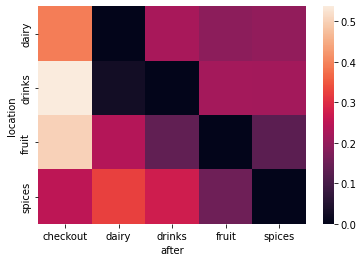

In [44]:
sns.heatmap(data=trans_prob_matrix)

In [296]:
customer_ids=df['customer_no'].to_list()

In [299]:
# using the savetxt from the numpy module
np.savetxt("customer_ids.csv", 
           customer_ids, 
           fmt ='% s')